In [1]:
import os
import sys

home = os.environ["HOME"]
sys.path.append(home+'/bin/python')

import numpy as np
import radmc3dPy
from radmc3dPy import analyze
from radmc3dPy import radsources

from matplotlib import cm
from radmc3dPy.image import *
from radmc3dPy.analyze import *
from radmc3dPy.natconst import *
from radmc3dPy.radsources import *

import matplotlib.ticker as ticker

In [8]:
#Initiates MCTHERM to calculate cell temperatures
#Note the number of photons; 1mil is the best balance, I've found
os.system('radmc3d mctherm nphot_therm 1000000 setthreads 8 countwrite 100000')
d = analyze.readData(ddens=True)

  
      WELCOME TO RADMC-3D: A 3-D CONTINUUM AND LINE RT SOLVER    
                                                                 
                          VERSION 2.0                            
                                                                 
                (c) 2008-2023 Cornelis Dullemond                 
                                                                 
       Please feel free to ask questions. Also please report     
        bugs and/or suspicious behavior without hestitation.     
      The reliability of this code depends on your vigilance!    
                    dullemond@uni-heidelberg.de                  
                                                                 
   To keep up-to-date with bug-alarms and bugfixes, follow the   
                     RADMC-3D code on github                     
             https://github.com/dullemond/radmc3d-2.0            
                                                                 
       

In [9]:
#After MCTHERM, create a spectrum from given POV
#Note we use loadlambda to get a custom wavelength set
#Also note: nphot_spec can have an important impact for "dense" cases
#where lots of photons "die"/get stuck and are absorbed before camera picks them up
#If your SED is super jagged, this is why, and you must increase number
#Default is 10K.
os.system('radmc3d spectrum incl 0 phi 0 loadlambda setthreads 8 nphot_spec 10000 countwrite 1000')

  
      WELCOME TO RADMC-3D: A 3-D CONTINUUM AND LINE RT SOLVER    
                                                                 
                          VERSION 2.0                            
                                                                 
                (c) 2008-2023 Cornelis Dullemond                 
                                                                 
       Please feel free to ask questions. Also please report     
        bugs and/or suspicious behavior without hestitation.     
      The reliability of this code depends on your vigilance!    
                    dullemond@uni-heidelberg.de                  
                                                                 
   To keep up-to-date with bug-alarms and bugfixes, follow the   
                     RADMC-3D code on github                     
             https://github.com/dullemond/radmc3d-2.0            
                                                                 
       

0

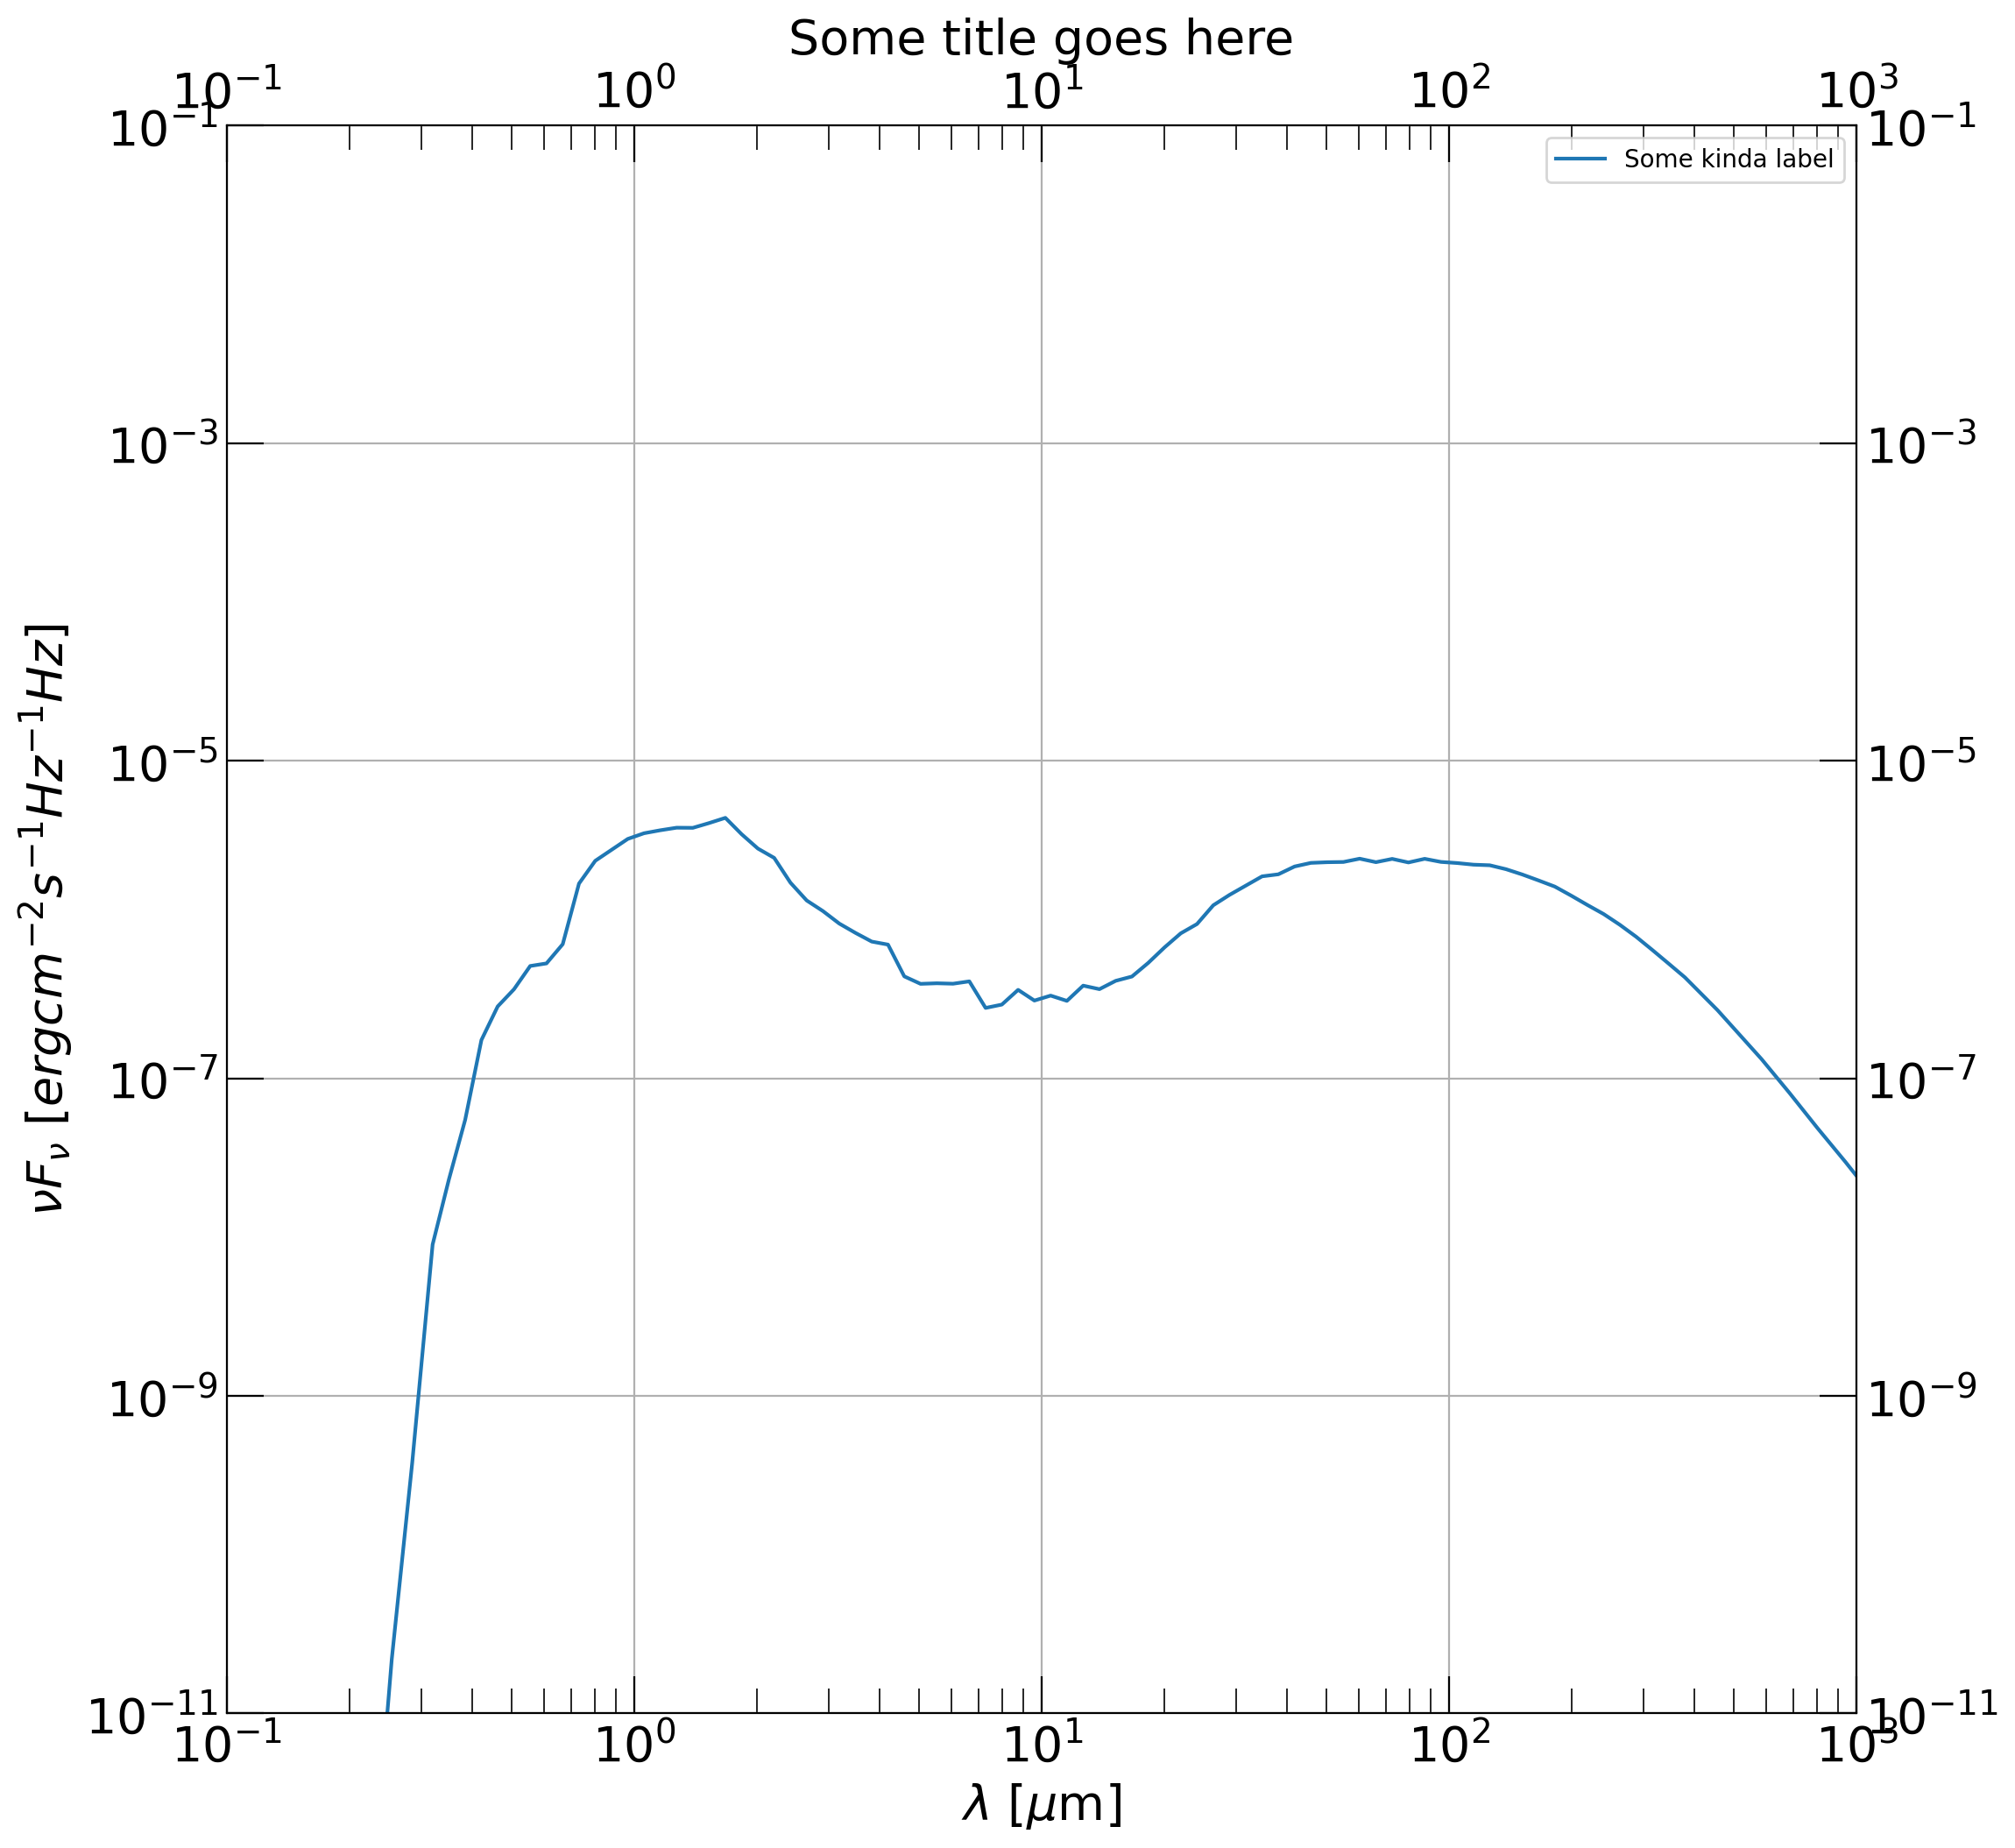

In [10]:
spectrum = analyze.readSpectrum('spectrum.out')

plt.figure(figsize=(12,12), dpi=200)
plotSpectrum(spectrum, xlg=True, ylg=True, micron=True, nufnu=True, oplot=True, label='Some kinda label')

#plt.xlim(10**-.45, 10**2)
#plt.ylim(10**-4, 10**-1)
plt.xlim(10**-1, 10**3)
plt.ylim(10**-11, 10**-1)
plt.title('Some title goes here', fontsize=20)
plt.xlabel('$\\lambda$ [$\\mu$m]', fontsize=20)
plt.ylabel('$\\nu F_\\nu$ $[erg cm^{-2} s^{-1} Hz^{-1} Hz]$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20, length=15, labeltop=True, labelright=True, top=True, right=True, direction='in')
plt.tick_params(axis='both', which='minor', labelsize=15, length=10, labeltop=True, labelright=True, bottom=True, left=True, top=True, right=True, direction='in')

plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()